In [1]:
import numpy as np 
import pandas as pd

import os
train_directory = (r"C:\Users\dell\Documents\SoilStation\MLmodel\Train")
test_directory = (r"C:\Users\dell\Documents\SoilStation\MLmodel\Test")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                rotation_range=10,
                                zoom_range=0.2,
                                shear_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
        train_directory, 
        target_size=(220, 220),
        batch_size = batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_directory, 
        target_size=(220, 220),
        batch_size = batch_size,
        class_mode='categorical',
        shuffle=False)


Found 360 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [14]:
import PIL
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [16]:
print (train_generator.class_indices)
print (test_generator.class_indices)

{'Black Soil': 0, 'Laterite Soil': 1, 'Peat Soil': 2, 'Yellow Soil': 3}
{'Black Soil': 0, 'Laterite Soil': 1, 'Peat Soil': 2, 'Yellow Soil': 3}


In [17]:
model = tf.keras.models.Sequential([
    
    # 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 6th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 256 neuron in the fully-connected layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 4 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [22]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [26]:
history = model.fit(
        train_generator, 
        validation_data = test_generator,
        epochs =40,
        verbose = 1,
        )

Epoch 1/40
36/36 [==============================] - 39s 972ms/step - loss: 1.1995 - accuracy: 0.4028 - val_loss: 0.6840 - val_accuracy: 0.6750
Epoch 2/40
36/36 [==============================] - 28s 779ms/step - loss: 0.7373 - accuracy: 0.6417 - val_loss: 0.7808 - val_accuracy: 0.6000
Epoch 3/40
36/36 [==============================] - 31s 852ms/step - loss: 0.7858 - accuracy: 0.5944 - val_loss: 0.5402 - val_accuracy: 0.7000
Epoch 4/40
36/36 [==============================] - 33s 921ms/step - loss: 0.6851 - accuracy: 0.6222 - val_loss: 0.9159 - val_accuracy: 0.4750
Epoch 5/40
36/36 [==============================] - 30s 833ms/step - loss: 0.6445 - accuracy: 0.6750 - val_loss: 0.4634 - val_accuracy: 0.6750
Epoch 6/40
36/36 [==============================] - 33s 910ms/step - loss: 0.6403 - accuracy: 0.6611 - val_loss: 1.0597 - val_accuracy: 0.6750
Epoch 7/40
36/36 [==============================] - 34s 930ms/step - loss: 0.6137 - accuracy: 0.6861 - val_loss: 0.5083 - val_accuracy: 0.7500

In [27]:
import matplotlib.pyplot as plt


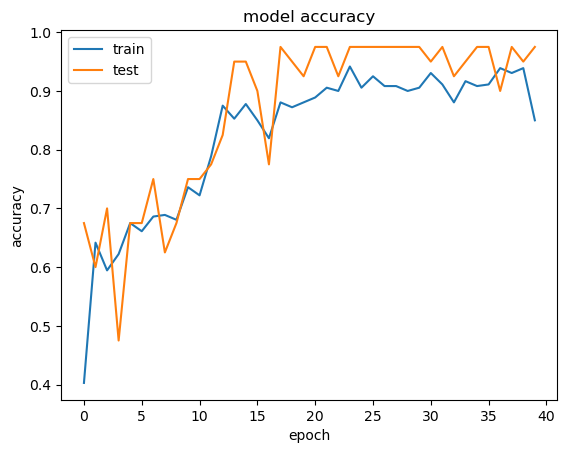

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelAccuracy')

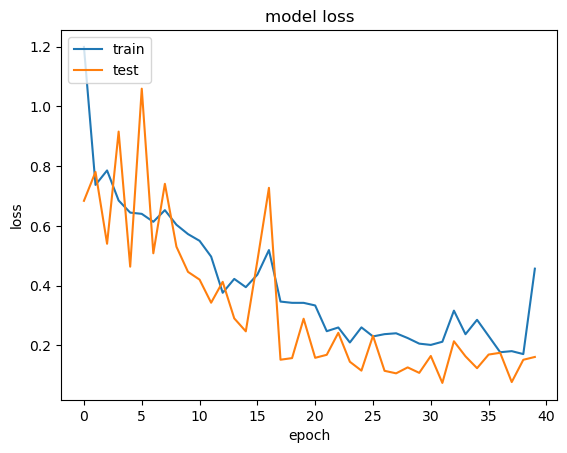

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('modelLoss.png')

In [35]:
model.save('SoilTypeIdentify.h5')

In [32]:
model.evaluate(test_generator)

4/4 [==============================] - 2s 424ms/step - loss: 0.1610 - accuracy: 0.9750


[0.16099250316619873, 0.9750000238418579]